In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/Kattur_test.csv')

In [4]:
df.head()

,YEAR,MO,DY,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax,Date
0,2015,1,1,22.40,31.52,25.59,16.85,3.02,3.05,3.71,6.76,01-01-2015
1,2015,1,2,21.12,32.08,25.75,16.11,0.06,4.60,2.20,6.80,02-01-2015
2,2015,1,3,20.40,31.94,25.35,15.20,0.00,5.96,0.41,6.38,03-01-2015
3,2015,1,4,21.39,32.18,25.55,15.44,0.00,4.91,2.31,7.23,04-01-2015
4,2015,1,5,20.50,31.94,25.13,14.77,0.00,3.62,3.97,7.59,05-01-2015


In [5]:
df.drop(['YEAR','MO','DY'],axis=1,inplace=True)

In [6]:
df.head()

,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax,Date
0,22.40,31.52,25.59,16.85,3.02,3.05,3.71,6.76,01-01-2015
1,21.12,32.08,25.75,16.11,0.06,4.60,2.20,6.80,02-01-2015
2,20.40,31.94,25.35,15.20,0.00,5.96,0.41,6.38,03-01-2015
3,21.39,32.18,25.55,15.44,0.00,4.91,2.31,7.23,04-01-2015
4,20.50,31.94,25.13,14.77,0.00,3.62,3.97,7.59,05-01-2015


In [7]:
df=df.iloc[:,[8,0,1,2,3,4,5,6,7],]
df.head()

,Date,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax
0,01-01-2015,22.40,31.52,25.59,16.85,3.02,3.05,3.71,6.76
1,02-01-2015,21.12,32.08,25.75,16.11,0.06,4.60,2.20,6.80
2,03-01-2015,20.40,31.94,25.35,15.20,0.00,5.96,0.41,6.38
3,04-01-2015,21.39,32.18,25.55,15.44,0.00,4.91,2.31,7.23
4,05-01-2015,20.50,31.94,25.13,14.77,0.00,3.62,3.97,7.59


In [8]:
df.drop(['tempmin','tempmax','temp','humi','ws','wsmin','wsmax'],axis=1,inplace=True)
df.head()

,Date,preci
0,01-01-2015,3.02
1,02-01-2015,0.06
2,03-01-2015,0.00
3,04-01-2015,0.00
4,05-01-2015,0.00


In [11]:
figure = px.scatter(df, x="Date", 
                 y="preci", 
                 title='Precipitaion in Trichy Over the Years')
figure.show()

In [13]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
df = df.rename(columns = {"Date": "ds", 
                                       "preci": "y"})
print(df)

              ds      y
0     01-01-2015   3.02
1     02-01-2015   0.06
2     03-01-2015   0.00
3     04-01-2015   0.00
4     05-01-2015   0.00
...          ...    ...
2993  16-03-2023   0.52
2994  17-03-2023   0.66
2995  18-03-2023   1.56
2996  19-03-2023  10.65
2997  20-03-2023  11.32

[2998 rows x 2 columns]


In [18]:
df['ds'] = pd.to_datetime(df.ds,infer_datetime_format=True)
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')
df.head()

,ds,y
0,2015-01-01,3.02
1,2015-02-01,0.06
2,2015-03-01,0.00
3,2015-04-01,0.00
4,2015-05-01,0.00


In [19]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(df)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lbl8x4j/q78nseit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lbl8x4j/gz6hlak1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58723', 'data', 'file=/tmp/tmp_lbl8x4j/q78nseit.json', 'init=/tmp/tmp_lbl8x4j/gz6hlak1.json', 'output', 'file=/tmp/tmp_lbl8x4j/prophet_modeljadk_6f8/prophet_model-20230329115121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:51:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:51:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
predictions.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,3.157313,-3.515393,9.755928,3.157313,3.157313,-0.138921,-0.138921,-0.138921,0.113157,0.113157,0.113157,-0.252078,-0.252078,-0.252078,0.0,0.0,0.0,3.018392
1,2015-01-02,3.155159,-3.345393,9.365974,3.155159,3.155159,-0.121381,-0.121381,-0.121381,0.056766,0.056766,0.056766,-0.178147,-0.178147,-0.178147,0.0,0.0,0.0,3.033778
2,2015-01-03,3.153005,-4.042536,8.934221,3.153005,3.153005,-0.318902,-0.318902,-0.318902,-0.199652,-0.199652,-0.199652,-0.119250,-0.119250,-0.119250,0.0,0.0,0.0,2.834103
3,2015-01-04,3.150851,-3.416359,9.353141,3.150851,3.150851,0.006332,0.006332,0.006332,0.082952,0.082952,0.082952,-0.076620,-0.076620,-0.076620,0.0,0.0,0.0,3.157182
4,2015-01-05,3.148697,-3.184982,9.320111,3.148697,3.148697,0.113046,0.113046,0.113046,0.164079,0.164079,0.164079,-0.051033,-0.051033,-0.051033,0.0,0.0,0.0,3.261743


In [21]:
predictionsdf=predictions.iloc[:,[0,18],]
predictionsdf.tail()

,ds,yhat
3358,2024-11-28,5.246102
3359,2024-11-29,4.985690
3360,2024-11-30,4.504044
3361,2024-12-01,4.543564
3362,2024-12-02,4.367448


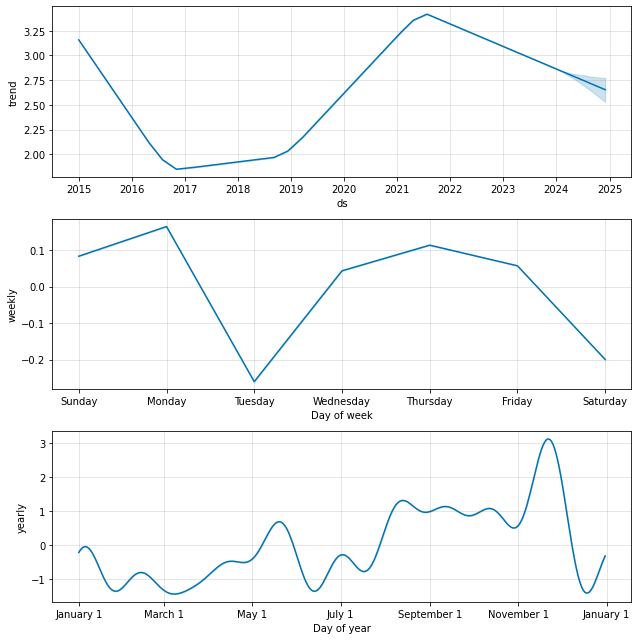

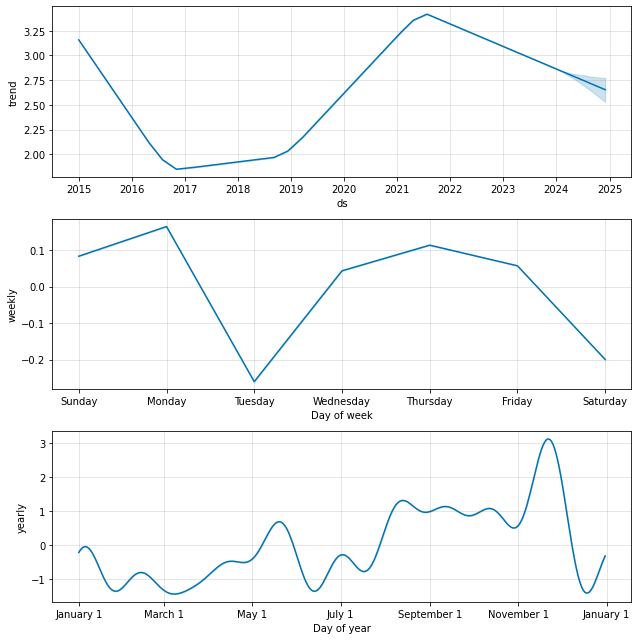

In [22]:
model.plot_components(predictions)